In [10]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
data = pd.read_csv("E:\\tripAdvisorReview_project\\New_Delhi_reviews.csv") 

In [3]:
data.head()

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [4]:
data.columns

Index(['rating_review', 'review_full'], dtype='object')

In [5]:
data.isnull().sum()

rating_review    0
review_full      2
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(147579, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147579 entries, 0 to 147580
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating_review  147579 non-null  int64 
 1   review_full    147579 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


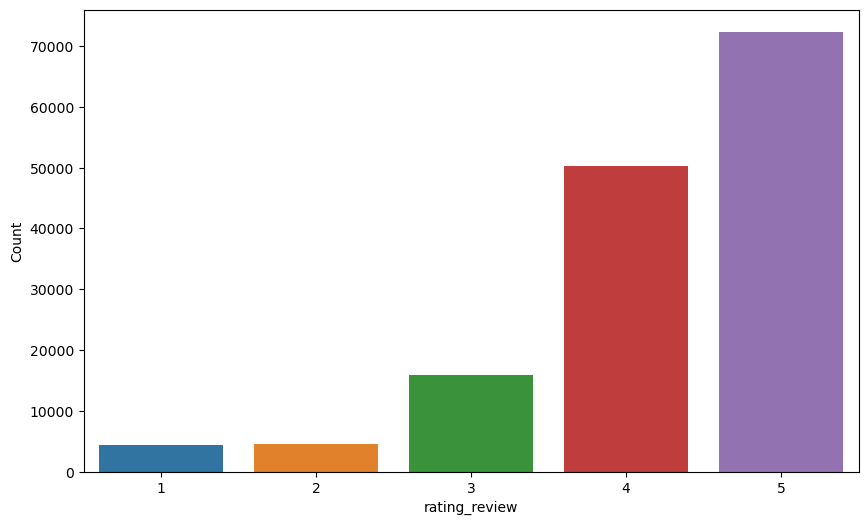

In [11]:
#using count plot to visualize the total counts of each rating
plt.figure(figsize=(10, 6))
sns.countplot(x='rating_review', data=data)
plt.xlabel('rating_review')
plt.ylabel('Count')
plt.show()

In [12]:
# Function for cleaning text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # Remove special characters
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

# Apply text cleaning
data['cleaned_review'] = data['review_full'].apply(clean_text)


In [13]:
#Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['cleaned_review'])


In [ ]:
wcss = []
for i in range(2, 50):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 50), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:

# Select the optimal number of clusters (e.g., 4 from the plot)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42,n_init=10)
labels = kmeans.fit_predict(X)
# Add cluster labels to the original dataframe
data['cluster'] = labels

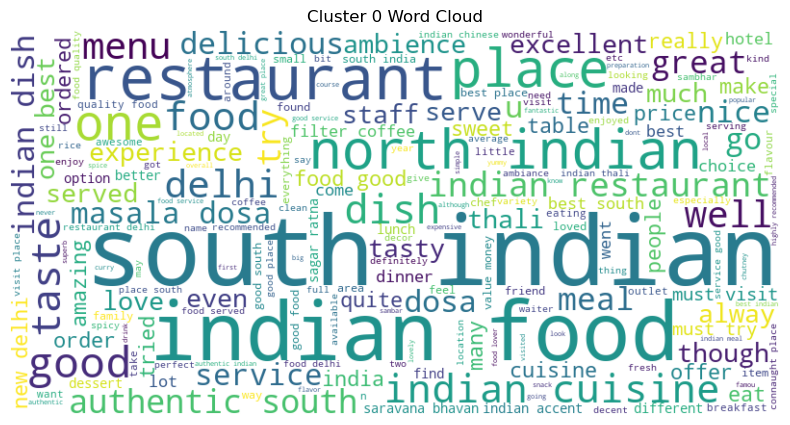

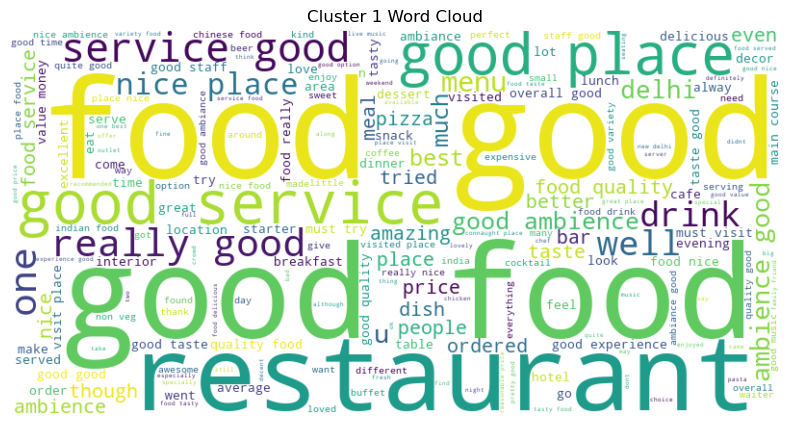

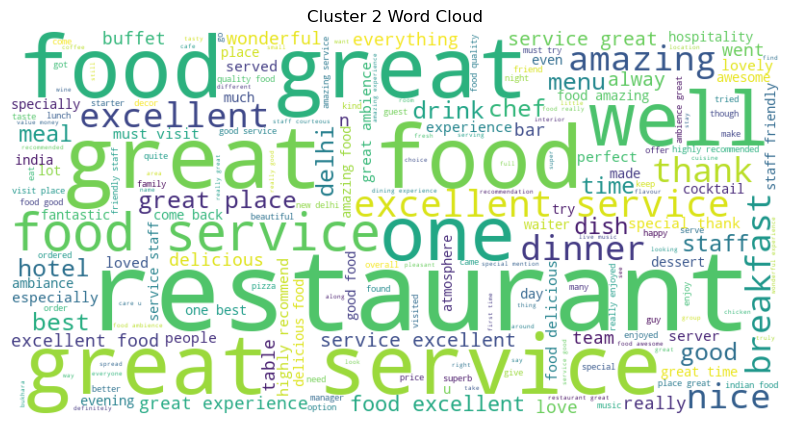

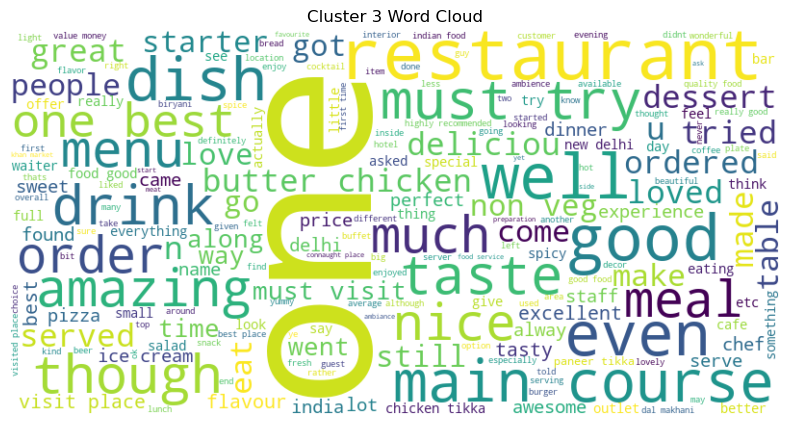

Positive Clusters: [0, 1, 2, 3]
Negative Clusters: []

Top Reviews in Cluster 0:
73     Food and services were very good  The staff wa...
81     Very tasty Indian food here in a contemporary ...
93     We visited the restaurant last night for a fam...
291    Our extended family of 8 chose NYC for brunch ...
300    I was looking for a place with a view yesterda...
Name: review_full, dtype: object

Top Reviews in Cluster 1:
2     We were few friends and was a birthday celebra...
10    We had drinks during happy hour, good selectio...
19    Thanks Shubham for a very entertaining evening...
20    Very good service. Lunch was tailored to our p...
24    was staying near by so visited this place. hug...
Name: review_full, dtype: object

Top Reviews in Cluster 2:
1     I went this bar 8 days regularly with my husba...
9     Real nice and comfortable bar. I am a whiskey ...
11    Stopping in Delhi for a day, we had a wonderfu...
13    A flying visit but has been amazing. Emmanuel ...
15    Amaz

In [19]:
# Step 4: Analyze Themes for Each Cluster
positive_clusters = []
negative_clusters = []

def analyze_cluster(cluster_number):
    cluster_data = data[data['cluster'] == cluster_number]
    text = ' '.join(cluster_data['cleaned_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_number} Word Cloud')
    plt.show()

    # Determine if cluster is positive or negative
    avg_rating = cluster_data['rating_review'].mean()  # Assuming a 'rating' column exists
    if avg_rating >= 4:
        positive_clusters.append(cluster_number)
    else:
        negative_clusters.append(cluster_number)

for i in range(optimal_clusters):
    analyze_cluster(i)

# Step 5: Results and Recommendations
print("Positive Clusters:", positive_clusters)
print("Negative Clusters:", negative_clusters)

# Top Themes
for cluster in positive_clusters + negative_clusters:
    cluster_data = data[data['cluster'] == cluster]
    print(f"\nTop Reviews in Cluster {cluster}:")
    print(cluster_data['review_full'].head(5))
